In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import random
import time
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#Semilla
np.random.seed(2020)

# Load data
(y_train, _), (y_test, _) = tf.keras.datasets.cifar10.load_data()
y_train = y_train / 255.
y_test  = y_test  / 255.

#print(y_train.shape)
#print(y_train.min())
#print(y_train.max())
#print(y_test.shape)
#print(y_test.min())
#print(y_test.max())

In [3]:
# AUX function to add noise
def add_noise(img, noise_size):
  patch_s = noise_size // 2
  cx = np.random.randint(patch_s, 32 - patch_s)
  cy = np.random.randint(patch_s, 32 - patch_s)
  img2 = img.copy()
  img2[cy - patch_s : cy + patch_s, cx - patch_s : cx + patch_s, :] = 0
  return img2

# Add noise to training set and show a few examples
x_train = np.array([add_noise(y, 10) for y in y_train])
x_test = np.array([add_noise(y, 10) for y in y_test])


In [4]:
# Mini proyecto: Inpainting and Denoising Autoencoder.

# Para el modelo anterior de Denoising Autoencoder (inpainting), explora el
# desempeño que puedas obtener probando distintos valores para los siguientes
# hiperparámetros.
# 1) Número de capas convolucionales, y número de filtros en cada capa.
# 2) Función de pérdida y activaciones de las capas.
# 3) Tamaño del lote (batch size) y número de épocas.

# En una tabla reporta el desempeño obtenido con tus 7 mejores modelos.
# Justifica por qué son tus mejores modelos.
# Incluye una lista de, al menos, 3 experiencias aprendidas con este ejercicio.

# Deadline: 18 de noviembre, 6:00 pm. PDF por correo electrónico.

In [5]:
#Reducimos el tamaño de los datos para hacer un premuestreo 
X_train = x_train[0:4400]
Y_train = y_train[0:4400]

#Vector para guardar los resultados 
mse_train = []
acc_train = []
loss_train = []


# Definimos los hiperparametros
#optimizers = ['RMSprop','Adam','SGD']
batch_sizes = [100,250,500]
epochs = [10,50,100]
losses = ['mean_squared_error','mean_squared_logarithmic_error','mean_absolute_error']
activaciones = ['relu','elu','tanh','selu']
number_of_layers = [2,3,4] #El numero de layers sera n*2

iteracion = 1
start = time.time()

print('Porcentaje terminado:')
# Definimos el modelo
for a in activaciones:
  for n in number_of_layers:
    AE = Sequential()
    AE.add(Input(shape=(32, 32, 3)))
    for i in range(n):
      AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation=a))
    for i in range(n-1):
      AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation=a))
    AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))
    # Compilacion del Modelo
    for l in losses:
      for b in batch_sizes:
        for e in epochs:
          AE.compile(optimizer='adam', loss=l,metrics = ['mse','acc'] )
          h = AE.fit(x=X_train, y=Y_train, batch_size=b, epochs=e, verbose=0, validation_split = 0.2)
          print("{} %".format( round((iteracion/324) *100,2)))
          iteracion = iteracion + 1
          
          # Guardandamos los resultados  
          mse_train.append(h.history['mse'][-1]) # Accuracy entrenamiento
          acc_train.append(h.history['acc'][-1]) # Accuracy validación
          loss_train.append(h.history['loss'][-1]) # Accuracy validación

end = time.time()
print("Tiempo: {}".format(end - start))

Porcentaje terminado:
0.31 %
0.62 %
0.93 %
1.23 %
1.54 %
1.85 %
2.16 %
2.47 %
2.78 %
3.09 %
3.4 %
3.7 %
4.01 %
4.32 %
4.63 %
4.94 %
5.25 %
5.56 %
5.86 %
6.17 %
6.48 %
6.79 %
7.1 %
7.41 %
7.72 %
8.02 %
8.33 %
8.64 %
8.95 %
9.26 %
9.57 %
9.88 %
10.19 %
10.49 %
10.8 %
11.11 %
11.42 %
11.73 %
12.04 %
12.35 %
12.65 %
12.96 %
13.27 %
13.58 %
13.89 %
14.2 %
14.51 %
14.81 %
15.12 %
15.43 %
15.74 %
16.05 %
16.36 %
16.67 %
16.98 %
17.28 %
17.59 %
17.9 %
18.21 %
18.52 %
18.83 %
19.14 %
19.44 %
19.75 %
20.06 %
20.37 %
20.68 %
20.99 %
21.3 %
21.6 %
21.91 %
22.22 %
22.53 %
22.84 %
23.15 %
23.46 %
23.77 %
24.07 %
24.38 %
24.69 %
25.0 %
25.31 %
25.62 %
25.93 %
26.23 %
26.54 %
26.85 %
27.16 %
27.47 %
27.78 %
28.09 %
28.4 %
28.7 %
29.01 %
29.32 %
29.63 %
29.94 %
30.25 %
30.56 %
30.86 %
31.17 %
31.48 %
31.79 %
32.1 %
32.41 %
32.72 %
33.02 %
33.33 %
33.64 %
33.95 %
34.26 %
34.57 %
34.88 %
35.19 %
35.49 %
35.8 %
36.11 %
36.42 %
36.73 %
37.04 %
37.35 %
37.65 %
37.96 %
38.27 %
38.58 %
38.89 %
39.2 %
39.51 %


In [46]:
# Creamos un data frame con respecto al mejore desempeño en entrenamiento
df = pd.DataFrame({'mse_train':mse_train, 'acc_train':acc_train, 'loss_train' : loss_train, 'iter':np.arange(1,325)})
df_train = df.sort_values([ 'loss_train','acc_train','mse_train',], ascending=[True, True,False])
best_train = np.asarray(df_train.iter[0:7])

# Vemos cuales fueron los mejores parametros de nuestro modelo
iter = 1
for a in activaciones:
  for n in number_of_layers:
    for l in losses:
      for b in batch_sizes:
        for e in epochs:
          if iter in best_train:
            print('Activacion: {} Num_layers: {} Loss_func: {} Batch_size: {} Epochs: {} Iter: {} '.format(a,n,l,b,e,iter))
          iter = iter + 1

Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 100 Epochs: 100 Iter: 255 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 250 Epochs: 10 Iter: 256 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 250 Epochs: 50 Iter: 257 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 250 Epochs: 100 Iter: 258 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 500 Epochs: 10 Iter: 259 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 500 Epochs: 50 Iter: 260 
Activacion: selu Num_layers: 2 Loss_func: mean_squared_logarithmic_error Batch_size: 500 Epochs: 100 Iter: 261 


In [47]:
df_train.head(7)

,mse_train,acc_train,loss_train,iter
260,0.005813,0.770077,0.002775,261
258,0.005841,0.770420,0.002788,259
259,0.005855,0.770451,0.002789,260
257,0.005854,0.769872,0.002791,258
256,0.005928,0.768311,0.002831,257
255,0.005953,0.768917,0.002843,256
254,0.005962,0.768932,0.002848,255


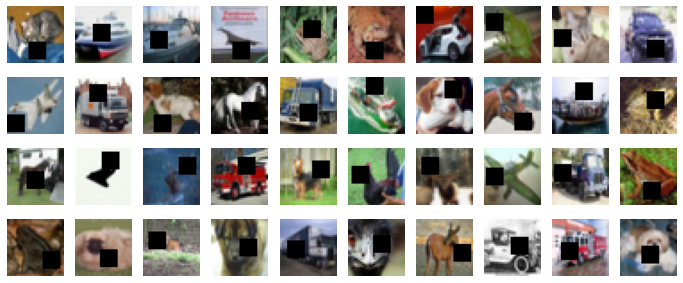

In [33]:
plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(x_test[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0060


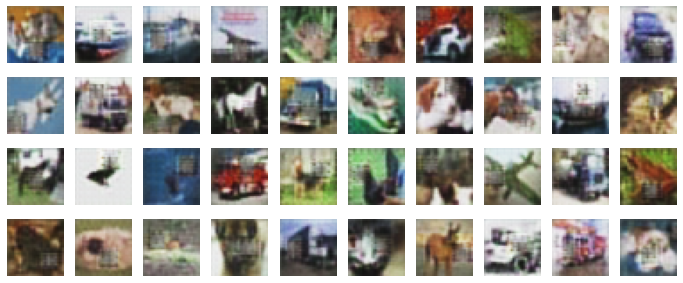

In [37]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=150, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0038


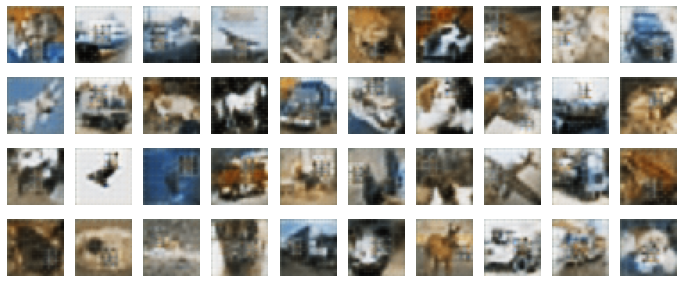

In [48]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_logarithmicF_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=50, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

In [ ]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=150, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0073


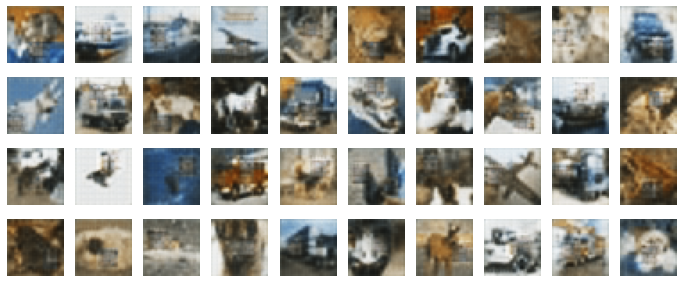

In [38]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=150, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0065


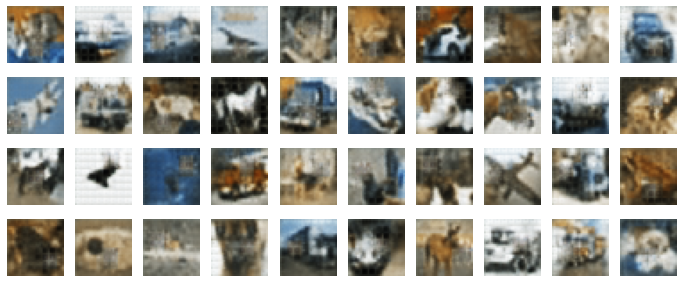

In [39]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_error')
h = AE.fit(x=x_train, y=y_train, batch_size=450, epochs=200, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0071


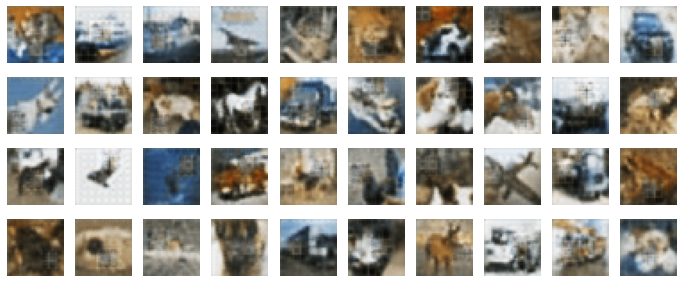

In [40]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_error')
h = AE.fit(x=x_train, y=y_train, batch_size=400, epochs=150, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.0032


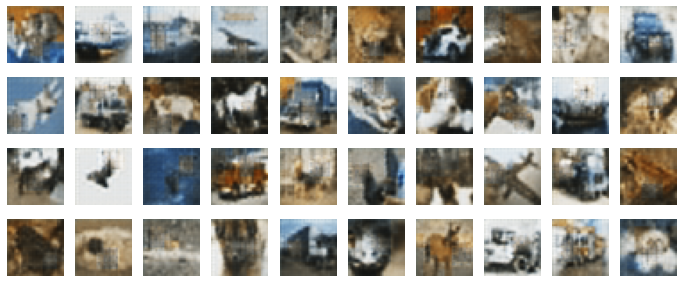

In [41]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='relu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_logarithmic_error')
h = AE.fit(x=x_train, y=y_train, batch_size=250, epochs=100, validation_split=0,verbose=0)
h.history['loss'][-1]

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0049


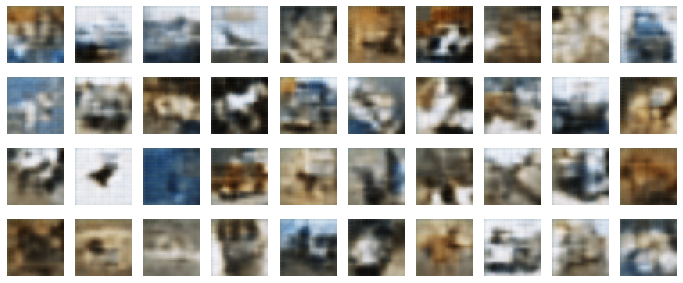

In [42]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_logarithmic_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=50, validation_split=0.2,verbose = 0)

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

In [ ]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_logarithmic_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=50, validation_split=0.2,verbose = 0)

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.0077


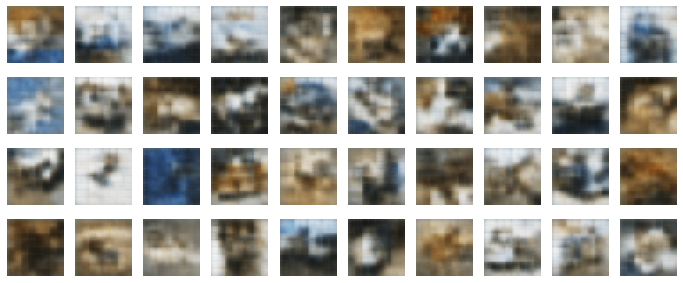

In [43]:
# Vemos como lucen los mejores modelos
AE = Sequential()
AE.add(Input(shape=(32, 32, 3)))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2D(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(8, 3, strides=(2, 2), padding='same', activation='selu'))
AE.add(Conv2DTranspose(3, 3, strides=(2, 2), padding='same', activation='sigmoid'))

#Compile
AE.compile(optimizer='Adam', loss='mean_squared_logarithmic_error')
h = AE.fit(x=x_train, y=y_train, batch_size=500, epochs=10, validation_split=0.2,verbose = 0)

y_test_hat = AE.predict(x_test)
AE.evaluate(x_test, y_test)

plt.figure(figsize=(12, 5))
for i in range(40):
  plt.subplot(4, 10, i+1)
  plt.imshow(y_test_hat[i])
  plt.axis('off')
plt.show()